In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [458]:
matrix = pd.read_table('data/newsgroups5/matrix.txt',delimiter=',',header=None)
terms = pd.read_table('data/newsgroups5/terms.txt',delimiter=',',header=None)

classes = pd.read_table('data/newsgroups5/classes.txt',delimiter=',',header=None)


In [459]:
print('\n matrix ',matrix.shape,'\n terms ',terms.shape,'\n classes ',classes.shape)


 matrix  (9328, 2500) 
 terms  (9328, 1) 
 classes  (2501, 5)


In [460]:
classes.head()

,0,1,2,3,4
0,% Five Categories: windows (0),crypt (1),christian (2),hockey (3),forsale (4)
1,0 0,NaN,NaN,NaN,NaN
2,1 1,NaN,NaN,NaN,NaN
3,2 1,NaN,NaN,NaN,NaN
4,3 1,NaN,NaN,NaN,NaN


In [461]:
dataMat = np.mat(matrix.T)
dataMat.shape

(2500, 9328)

### a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [7]:
def calculateEuclideanDistance(x,D):
    dist = np.sqrt((D -x)**2).sum(axis=1)
    return dist

def calculateCosineSimilarityDistance(x,D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist



### b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [316]:
matrix = pd.read_table('data/newsgroups5/matrix.txt',delimiter=',',header=None).T
terms = pd.read_table('data/newsgroups5/terms.txt',delimiter=',',header=None)
classes = np.genfromtxt('data/newsgroups5/classes.txt',delimiter=' ', dtype=int, skip_header=1, usecols=(1))


In [110]:
print('\n matrix ',matrix.shape,'\n terms ',terms.shape,'\n classes ',classes.shape)


 matrix  (2500, 9328) 
 terms  (9328, 1) 
 classes  (2500,)


In [422]:
matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
count,2.50e+03,2.50e+03,2500.00,2.50e+03,2500.00,2.50e+03,2500.00,2.50e+03,2500.00,2500.00,...,2.50e+03,2.50e+03,2.50e+03,2.50e+03,2.50e+03,2.50e+03,2500.00,2.50e+03,2.50e+03,2.50e+03
mean,6.40e-03,2.40e-03,0.03,4.80e-03,0.01,4.00e-03,0.02,1.60e-03,0.03,0.08,...,5.20e-03,6.40e-03,1.60e-03,7.60e-03,2.80e-03,3.20e-03,0.02,4.40e-03,2.40e-03,6.00e-03
std,1.38e-01,4.89e-02,0.95,8.47e-02,0.23,6.92e-02,0.25,4.90e-02,0.24,0.35,...,1.04e-01,1.88e-01,4.90e-02,1.95e-01,8.72e-02,6.92e-02,0.52,1.66e-01,8.48e-02,1.56e-01
min,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
25%,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
50%,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
75%,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00e+00
max,6.00e+00,1.00e+00,47.00,2.00e+00,9.00,2.00e+00,7.00,2.00e+00,6.00,4.00,...,3.00e+00,7.00e+00,2.00e+00,8.00e+00,3.00e+00,2.00e+00,20.00,8.00e+00,4.00e+00,5.00e+00


In [423]:
 matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Columns: 9328 entries, 0 to 9327
dtypes: int64(9328)
memory usage: 177.9 MB


In [424]:
vs_matrix = np.mat(matrix)
vs_matrix.shape

(2500, 9328)

In [425]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, classes, test_size=0.2, random_state=33)


In [426]:
print("train : ",vs_train.shape)
print("Test : ",vs_test.shape)

train :  (2000, 9328)
Test :  (500, 9328)


#### 2.c Perform Kmeans clustering on the training data

In [427]:
# def distEuclid(vecA, vecB):
#     return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

## get random centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [428]:
print('max = ',max(dataMat[:,2499]),'min = ',min(dataMat[:,2499]))

max =  [[7]] min =  [[0]]


In [24]:
%%time
centroids = randCent(dataMat,2)

Wall time: 4min 15s


In [119]:
centroids

array([[0.        , 0.00990099, 0.00247525, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.00440252, 0.        , 0.04528302, ..., 0.00125786, 0.00062893,
        0.00377358],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [429]:
def kmeans(D,k,distMeas=calculateCosineSimilarityDistance,createCentroid = randCent):
    m = np.shape(D)[0]
    
    ## cluster assignment matrix with 2 cols. one for cluster index and 2nd one for cluster error (distance from cluster centroid to the current point)
    clusterAssment = np.mat(np.zeros((m,2)))
    
    print('calculating centroids : Start')
    centroids = createCentroid(D,k)
    print('calculating centroids : End','\n centroids are :: \n',centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        ## loop over data points and assign assign it to the closest centroid
        for i in range(m):
            minDIst = np.inf;
            minIndex = -1;
            for j in range(k):
                distJI = distMeas(centroids[j,:],D[i,:])
                ##print('Distance ',distJI)
                if(distJI < minDIst):
                    minDIst = distJI;
                    minIndex = j;
            if clusterAssment[i,0] !=minIndex : clusterChanged = True
            clusterAssment[i,:] = minIndex, minDIst**2
        #print(" centroids : ",centroids)
        
        ## update the centroid
        for cent in range(k):
            ptsInClust = D[np.nonzero(clusterAssment[:,0] == cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids, clusterAssment

In [445]:
%%time
centroids, clusterAssment = kmeans(vs_train,5)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[ 0.63  0.83 22.68 ...  1.93  0.49  2.99]
 [ 0.39  0.67 28.61 ...  0.17  0.68  2.55]
 [ 0.94  0.75 17.9  ...  0.7   0.23  3.1 ]
 [ 0.34  0.73 21.79 ...  1.56  0.97  3.25]
 [ 0.93  0.19 21.79 ...  1.28  0.69  3.78]]


M:\apps\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
M:\apps\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-429-e4a2d4a73a0a>:20: RuntimeWarning: invalid value encountered in less
  if(distJI < minDIst):


Wall time: 3min 35s


In [433]:
centroids.shape

(5, 9328)

In [446]:
centroids

array([[0.  , 0.  , 0.  , ..., 0.17, 0.  , 0.  ],
       [0.01, 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [0.  , 0.  , 0.06, ..., 0.  , 0.  , 0.01]])

In [447]:
clusterAssment[:10]

matrix([[1.  , 0.74],
        [1.  , 0.75],
        [1.  , 0.69],
        [1.  , 0.68],
        [4.  , 0.66],
        [4.  , 0.64],
        [1.  , 0.38],
        [4.  , 0.62],
        [1.  , 0.75],
        [1.  , 0.52]])

In [448]:
def top_terms(N, centroids, clusters,range_val):
    #tersm is 1D. get all 0 index data i.e. all the terms
    term_list = pd.Series(terms[0], name='Term')
    clusters = pd.DataFrame(clusters)
    for i in range(range_val):
        ## get cluster member indexes
        cl_index = np.array(clusters.index[clusters.iloc[:,0]==i])
        
        # gen centroids for the current (ith) cluster
        centroid = pd.Series(centroids[i], name='Centroid_value')
        
        # concate the terms and centroids gives terms and distance of the term from centroid
        clust = pd.concat([term_list, centroid],axis=1)
        
        ## number of documents in the current cluster
        clust_docs = len(cl_index)
        
        print('\nCluster: ',i,' results')
        print('Number of documents in cluster',str(clust_docs))
        print("\tword\tfrequency\tDF\tPercentOfDocs")
        clust_df = clust.iloc[cl_index]
        #.head()
        clust_df.sort_values(by='Centroid_value', axis=0, ascending=False, inplace=True)
        top_n = clust_df.head(N)
        for t in top_n.itertuples():
            ## get the doc frequency of the term
            doc_freq = t.Centroid_value * clust_docs
            mean_freq = np.mean(t.Centroid_value)
            PercentOfDocs = t.Centroid_value * 100
            print(term_list[term_list == t.Term].index[0],'\t',t.Term,'\t',mean_freq,'\t',doc_freq,'\t',PercentOfDocs)

In [444]:
%%time
range_val = 5
top_terms(10, centroids, clusterAssment,range_val)


Cluster:  0  results
Number of documents in cluster 1
	word	frequency	DF	PercentOfDocs
1515 	 commision 	 0.0 	 0.0 	 0.0

Cluster:  1  results
Number of documents in cluster 1201
	word	frequency	DF	PercentOfDocs
1335 	 christian 	 0.49791840133222315 	 598.0 	 49.791840133222316
1346 	 church 	 0.30724396336386345 	 369.0 	 30.724396336386345
1425 	 clipper 	 0.305578684429642 	 367.0 	 30.5578684429642
1914 	 cx 	 0.23896752706078267 	 287.0 	 23.896752706078267
1936 	 dai 	 0.2289758534554538 	 275.0 	 22.89758534554538
1333 	 christ 	 0.21232306411323898 	 255.00000000000003 	 21.232306411323897
439 	 ask 	 0.19567027477102414 	 235.0 	 19.567027477102414
1977 	 david 	 0.18900915903413823 	 227.0 	 18.90091590341382
131 	 against 	 0.16819317235636969 	 202.0 	 16.81931723563697
352 	 appear 	 0.15903413821815154 	 191.0 	 15.903413821815155

Cluster:  2  results
Number of documents in cluster 5
	word	frequency	DF	PercentOfDocs
482 	 atlanta 	 0.0 	 0.0 	 0.0
843 	 bo 	 0.0 	 0.0

<ipython-input-443-e0b5d6631a2c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df.sort_values(by='Centroid_value', axis=0, ascending=False, inplace=True)


### 2c pip install wordcloud or conda install -c conda-forge wordcloud 

In [449]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [337]:
?WordCloud

In [450]:
vs_train[np.ravel(clusterAssment[:,0]==0)]

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [451]:
cluster_numbers = set(np.ravel(clusterAssment[:,0]))
terms_array = np.array(terms)
datClusMap = {}

t_list = list(terms_array.T[0])

# iterate through cluster
for i in cluster_numbers:
        ## get all docuemnts cor cluster# i
        dT = pd.DataFrame(vs_train[np.ravel(clusterAssment[:,0]==int(i))])
        # rename/attach name to the columns
        dT.columns = terms_array.T[0]
        
        ## evaluate the term frequency
        term_freq = list(np.array((dT.T!=0).sum(1).T))
        
        ## get the terms present in the clsuer documents i.e. for which value is not zero
        cluster_term_list=term_list[np.ravel(np.nonzero(term_freq))]
        
        # using list comprehension- concatenate all present terms/words into one giant string for word cloud
        cluster_terms = ' '.join(map(str, cluster_term_list)) 
        
        datClusMap['C'+str(int(i))] = cluster_terms

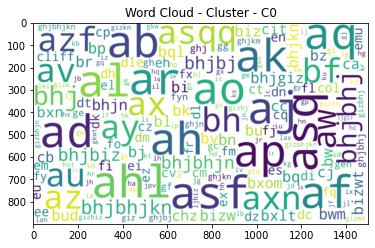

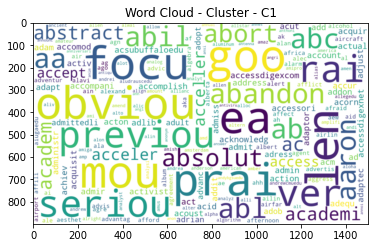

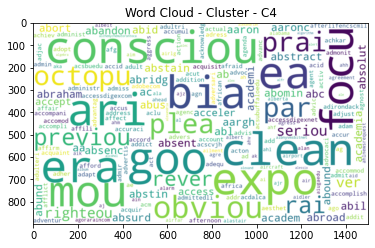

In [452]:
for key in datClusMap.keys():
    word_cloud_img = WordCloud(max_font_size=200, width=1500, height=900, background_color='white').generate(datClusMap.get(key))
    plt.imshow(word_cloud_img,interpolation="bilinear")
    plt.title('Word Cloud - Cluster - '+key)
    plt.show()

### 2d Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [453]:
vs_target_train

array([4, 0, 4, ..., 2, 0, 1])

In [454]:
from sklearn.metrics import completeness_score, homogeneity_score

#NOTE: this generates a random score every time you run the cluster
print("completeness_score = ",completeness_score(vs_target_train,np.ravel(clusterAssment.T[0])))
print("homogeneity_score = ",homogeneity_score(vs_target_train,np.ravel(clusterAssment.T[0])))

completeness_score =  0.6612532253970301
homogeneity_score =  0.2838903346737976


### 2e Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [455]:

results = []

for doc in vs_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        cluster += 1
        val = np.ravel(calculateCosineSimilarityDistance(centroid,doc))[0]
        #print("val ",val)
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster)] = str(np.ravel(centroid_doc_sim)[0])
    dic['Predicted Cluster'] = sim.index(max(sim))+1
    results.append(dic)

test_cluster = pd.DataFrame(results)

In [456]:
test_cluster

,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Predicted Cluster
0,2.343730792664367e-05,0.13394148275233553,nan,nan,0.19939897843901033,5
1,6.536352890607056e-06,0.12833330239999707,nan,nan,0.19848278354503357,5
2,3.100464408734016e-05,0.1584690000756358,nan,nan,0.14422073594488494,2
3,2.7167084271306763e-05,0.39745022678819475,nan,nan,0.2852966288902986,2
4,1.8186966430633333e-05,0.163960316874308,nan,nan,0.11573684702138709,2
...,...,...,...,...,...,...
495,1.3208177853107905e-05,0.17998231971500145,nan,nan,0.30786073967964533,5
496,2.8500672307196773e-05,0.11378556510655391,nan,nan,0.1837448585159105,5
497,1.5745193049920836e-05,0.08975452433094455,nan,nan,0.14876647863916992,5
498,3.0475902494164764e-05,0.16357246289696203,nan,nan,0.32954381512019193,5
